# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('CA_housing.csv')
dataset = dataset.dropna(axis=0)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = pd.concat([dataset.iloc[:, :-2], dataset.iloc[:, -1]], axis=1).values
X = np.array(ct.fit_transform(X))
y = dataset.iloc[:, -2:-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the whole dataset

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [41]:
regressor.predict([[0.0, 1.0, 0.0, 0.0, 0.0, -121.24, 39.37, 16.0, 2785.0, 616.0,
       1387.0, 530.0, 2.3886]])

array([89400.])

In [26]:
y[-1]

array([89400.])

## Visualising the Decision Tree Regression results (higher resolution)

In [33]:
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(X, y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (Decision Tree Regression)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

In [42]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[120600.  98900.]
 [140200. 153000.]
 [ 89800.  91300.]
 ...
 [155000. 127000.]
 [195200. 158600.]
 [245100. 175000.]]


In [43]:
df = pd.DataFrame(data=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), columns=['Predicted ($)', 'Actual ($)'])
df

,Predicted ($),Actual ($)
0,120600.0,98900.0
1,140200.0,153000.0
2,89800.0,91300.0
3,441400.0,345200.0
4,344200.0,344100.0
...,...,...
4082,101500.0,76300.0
4083,178600.0,261600.0
4084,155000.0,127000.0
4085,195200.0,158600.0


In [18]:
import dataframe_image as dfi
dfi.export(df, 'act_pred_dtr.png', max_rows=5)

In [20]:
px = np.linspace(0, max(y_test), int(max(y_test)))
py = np.linspace(0, max(y_test), int(max(y_test)))

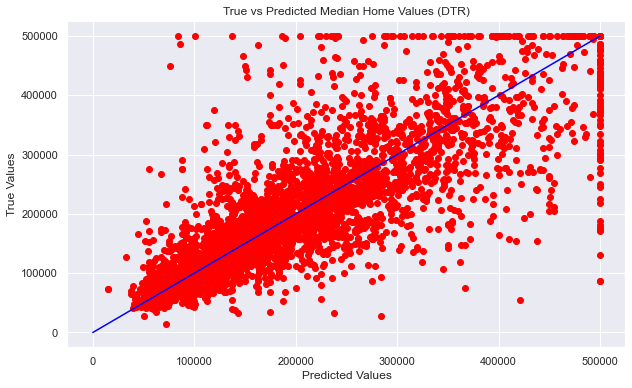

In [70]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.set()
plt.scatter(y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1), color = 'red')
plt.plot(px, py, color='blue')
plt.title('True vs Predicted Median Home Values (DTR)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()
# plt.savefig('act_pred_svr_scatter.png')

In [73]:
from sklearn.metrics import r2_score
print('R2: ', r2_score(y_test, y_pred))
print('Adjusted R2: ', 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

R2:  0.656319937915596
Adjusted R2:  0.6552229968875829


In [72]:
from sklearn.metrics import mean_squared_error
import math
mean_squared_error(y_test, y_pred, squared=False)

67836.33338033273

In [54]:
cols = np.array(dataset.columns)
cols

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [59]:
cols = cols[cols!='median_house_value']
cols = cols[cols!='ocean_proximity']

In [67]:
np.concatenate(['1 2 3 4 5'.split(), cols])

13

In [69]:
# from pydotplus.graphviz import graph_from_dot_data
# from sklearn.tree import export_graphviz

# dot_data = export_graphviz(                           # Create dot data
#     regressor, filled=True, rounded=True,
#     class_names=['Setosa', 'Versicolor','Virginica'],
#     feature_names=np.concatenate(['1 2 3 4 5'.split(), cols]),
#     out_file=None
# )

# graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
# graph.write_png('tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.033598 to fit



True